source:
https://github.com/pradeepponduri/Time-Series-Forecasting/blob/master/arima_model.ipynb

In [25]:
import requests, pandas as pd, numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import arma_order_select_ic
import itertools
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller

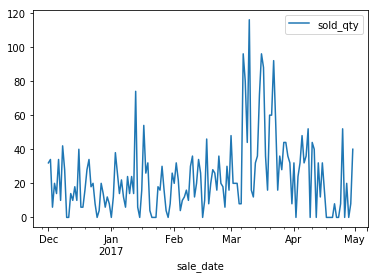

In [3]:
item_df=pd.read_csv('item_sales.csv',parse_dates=True,index_col='sale_date')

item_df.plot()

In [4]:
def test_stationarity(series):
    
    #rolling mean
    rmean=series.rolling(window=7,center=False).mean()
    rstd=series.rolling(window=7,center=False).std()
    
    #plot statistics
    orig = plt.plot(series, color='blue',label='Original')
    mean = plt.plot(rmean, color='red', label='Rolling Mean')
    std = plt.plot(rstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [5]:
item_df['sold_qty']

sale_date
2016-12-01    32
2016-12-02    34
2016-12-03     6
2016-12-04    20
2016-12-05    14
2016-12-06    34
2016-12-07    10
2016-12-08    42
2016-12-09    28
2016-12-10     0
2016-12-11     0
2016-12-12    14
2016-12-13    10
2016-12-14    18
2016-12-15    10
2016-12-16    40
2016-12-17     6
2016-12-18     6
2016-12-19    16
2016-12-20    28
2016-12-21    34
2016-12-22    18
2016-12-23    20
2016-12-24     8
2016-12-25     0
2016-12-26     4
2016-12-27    20
2016-12-28    14
2016-12-29     6
2016-12-30    12
              ..
2017-04-01    32
2017-04-02     0
2017-04-03    24
2017-04-04    32
2017-04-05    48
2017-04-06    32
2017-04-07    36
2017-04-08    52
2017-04-09     0
2017-04-10    44
2017-04-11    40
2017-04-12     0
2017-04-13    32
2017-04-14    12
2017-04-15    32
2017-04-16    16
2017-04-17     0
2017-04-18     0
2017-04-19     0
2017-04-20     0
2017-04-21     8
2017-04-22     0
2017-04-23     0
2017-04-24     8
2017-04-25    52
2017-04-26     0
2017-04-27    20
2017

In [6]:
item_df['sold_qty'].shape

(151,)

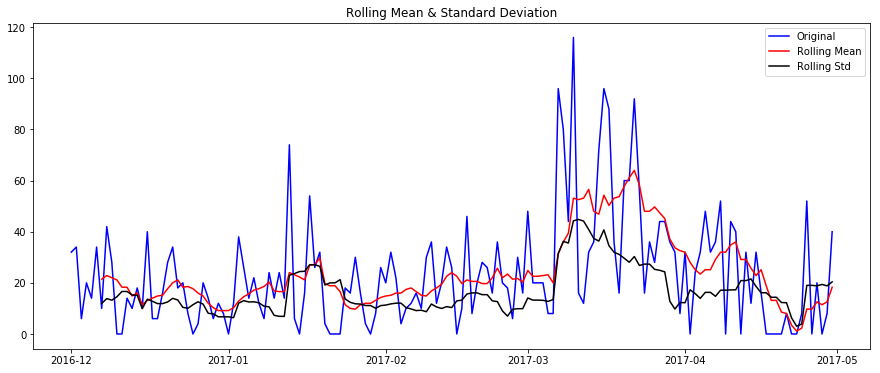

Results of Dickey-Fuller Test:
Test Statistic                  -1.892149
p-value                          0.335763
#Lags Used                       6.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


In [17]:
test_stationarity(item_df['sold_qty'])

Results show that series is not stationary and hence we will differentiate to make it stationary


In [19]:
tseries=item_df['sold_qty']
tseries_diff=tseries-tseries.shift()

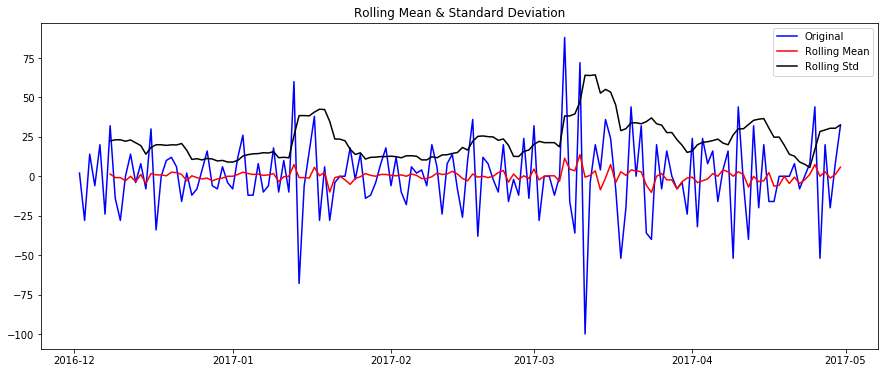

Results of Dickey-Fuller Test:
Test Statistic                -1.053852e+01
p-value                        8.772427e-19
#Lags Used                     5.000000e+00
Number of Observations Used    1.440000e+02
Critical Value (1%)           -3.476598e+00
Critical Value (5%)           -2.881829e+00
Critical Value (10%)          -2.577589e+00
dtype: float64


In [20]:
tseries_diff.dropna(inplace=True)
test_stationarity(tseries_diff)

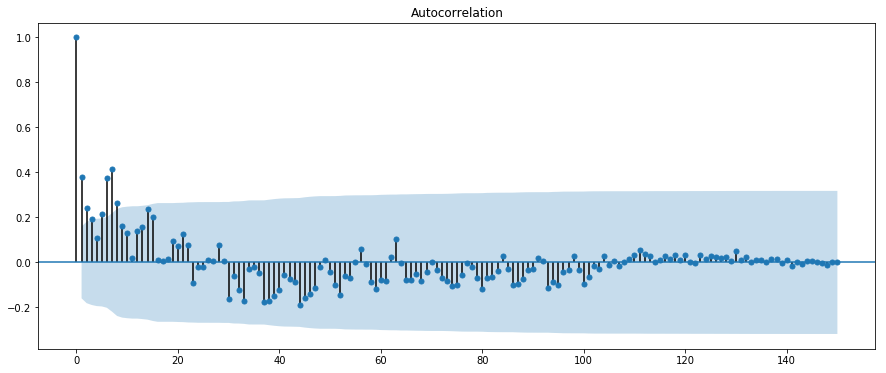

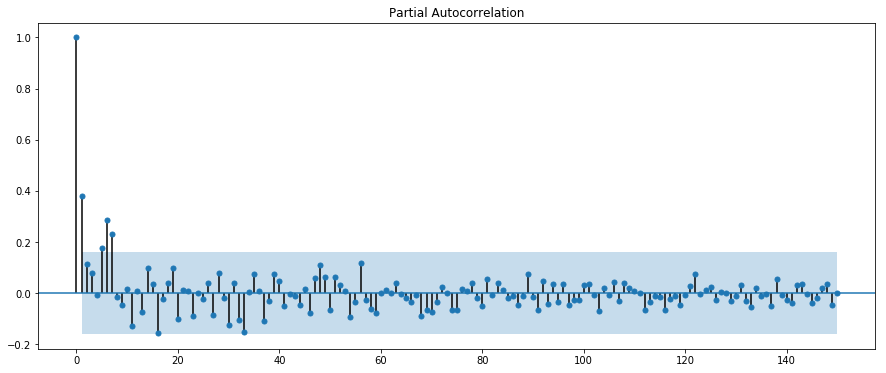

In [21]:
plot_acf(tseries)

plot_pacf(tseries)
pyplot.show()

C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


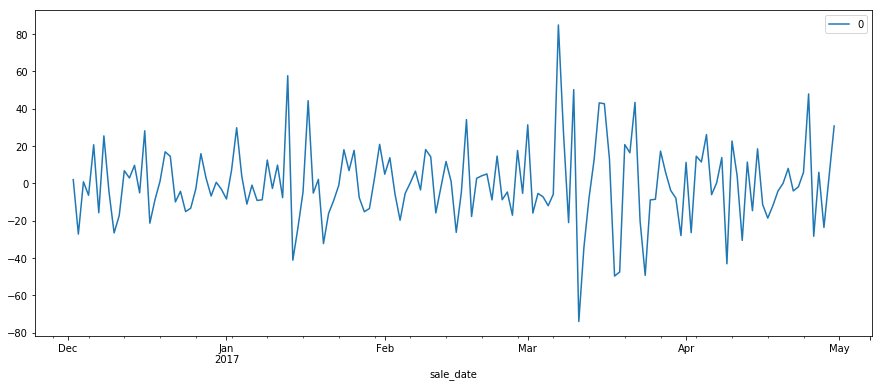

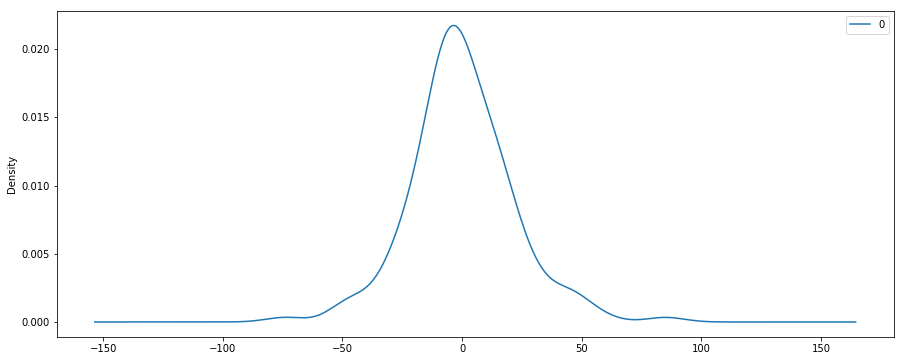

                0
count  150.000000
mean    -0.039516
std     21.563278
min    -74.020695
25%    -10.808743
50%     -2.426582
75%     12.325609
max     84.937659


In [22]:
model=ARIMA(tseries.astype(float),order=(2,1,0)).fit(disp=0)

residuals = pd.DataFrame(model.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [23]:
X = tseries.values
size = int(len(X) * 0.67)
size

train, test = X[0:size], X[size:len(X)]

C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\raja.raman\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=55.889046, expected=12.000000
predicted=50.594455, expected=32.000000
predicted=22.211767, expected=36.000000
predicted=27.455332, expected=72.000000
predicted=52.105878, expected=96.000000
predicted=74.699349, expected=88.000000
predicted=86.383503, expected=36.000000
predicted=64.307684, expected=16.000000
predicted=38.621946, expected=60.000000
predicted=46.067702, expected=60.000000
predicted=47.651353, expected=92.000000
predicted=78.924212, expected=56.000000
predicted=64.304968, expected=16.000000
predicted=43.024934, expected=36.000000
predicted=38.485299, expected=28.000000
predicted=26.084251, expected=44.000000
predicted=39.497190, expected=44.000000
predicted=40.050864, expected=36.000000
predicted=39.509866, expected=32.000000
predicted=35.839367, expected=8.000000
predicted=18.843891, expected=32.000000
predicted=28.048972, expected=0.000000
predicted=7.418054, expected=24.000000
predicted=21.345696, expected=32.000000
predicted=22.475337, expected=48.000000
pre

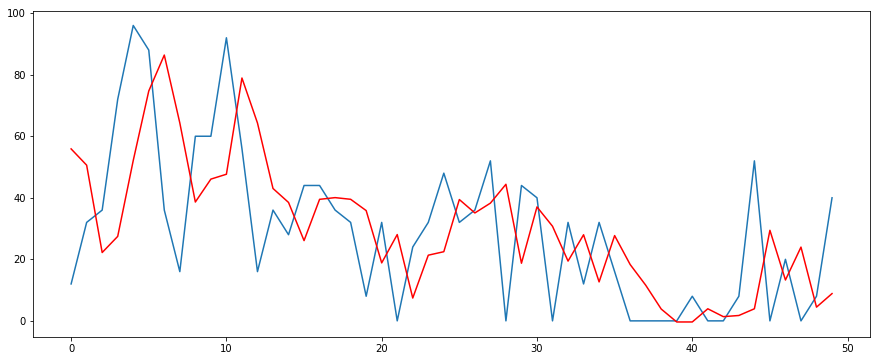

In [27]:
history = [x for x in train.astype(float)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

The End